In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from your CSV file

df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Display basic information about the dataset
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Summary Statistics:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Missing Values:
age               0
workcl

In [4]:
# 1. Data Exploration and Preprocessing
# Handle missing values: Drop rows with missing values
df.dropna(inplace=True)
print("\nAfter dropping missing values:")
print(df.isnull().sum())


After dropping missing values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [5]:
# Scaling numerical features
numerical_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [8]:
# Min-Max Scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Detected numerical features:", numerical_features)


print("\nStandard Scaling and Min-Max Scaling applied to numerical features.")

Detected numerical features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Standard Scaling and Min-Max Scaling applied to numerical features.


In [9]:
print("\nStandard Scaling is preferred for algorithms sensitive to feature magnitude differences (e.g., SVM, Logistic Regression).")
print("Min-Max Scaling is ideal for algorithms needing normalized data in a fixed range, such as Neural Networks or K-Means.")


Standard Scaling is preferred for algorithms sensitive to feature magnitude differences (e.g., SVM, Logistic Regression).
Min-Max Scaling is ideal for algorithms needing normalized data in a fixed range, such as Neural Networks or K-Means.


In [10]:
# 2. Encoding Techniques
# Apply One-Hot Encoding to categorical variables with less than 5 categories
one_hot_features = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() <= 5]
df_one_hot_encoded = pd.get_dummies(df, columns=one_hot_features)

In [11]:
# Use Label Encoding for categorical variables with more than 5 categories
label_features = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() > 5]
label_encoder = LabelEncoder()
for feature in label_features:
    df[feature] = label_encoder.fit_transform(df[feature])

print("\nEncoding completed: One-Hot Encoding for small categories and Label Encoding for larger categories.")



Encoding completed: One-Hot Encoding for small categories and Label Encoding for larger categories.


In [12]:
# Discuss encoding methods
print("\nOne-Hot Encoding is preferred for smaller category sets but increases dimensionality.")
print("Label Encoding is efficient for larger category sets but imposes an ordinal relationship.")



One-Hot Encoding is preferred for smaller category sets but increases dimensionality.
Label Encoding is efficient for larger category sets but imposes an ordinal relationship.


In [15]:
# 3. Feature Engineering
# Create new features
df['capital_total'] = df['capital_gain'] - df['capital_loss']
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

print("\nNew features created: 'capital_total' and 'age_group'.")


New features created: 'capital_total' and 'age_group'.


In [17]:
# Apply log transformation to skewed features
df['capital-gain-log'] = np.log1p(df['capital_gain'])
print("\nLog transformation applied to 'capital_gain' due to skewness.")


Log transformation applied to 'capital_gain' due to skewness.


In [18]:
# 4. Feature Selection
# Use Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df[numerical_features])
df = df[outliers == 1]  # Keep only inliers

print("\nOutliers removed using Isolation Forest.")

C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Outliers removed using Isolation Forest.


In [19]:
# PPS analysis
pps_matrix = pps.matrix(df)
print("\nPPS Matrix:\n", pps_matrix)


PPS Matrix:
                     x                 y   ppscore            case  \
0                 age               age  1.000000  predict_itself   
1                 age         workclass  0.000000      regression   
2                 age            fnlwgt  0.000000      regression   
3                 age         education  0.000000      regression   
4                 age     education_num  0.000000      regression   
..                ...               ...       ...             ...   
319  capital-gain-log    native_country  0.000000      regression   
320  capital-gain-log            income  0.265112  classification   
321  capital-gain-log     capital_total  0.754218      regression   
322  capital-gain-log         age_group  0.012616  classification   
323  capital-gain-log  capital-gain-log  1.000000  predict_itself   

     is_valid_score               metric  baseline_score   model_score  \
0              True                 None        0.000000      1.000000   
1        

C:\Users\Manisha Chandanshiv\AppData\Local\Temp\ipykernel_13060\2614875905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


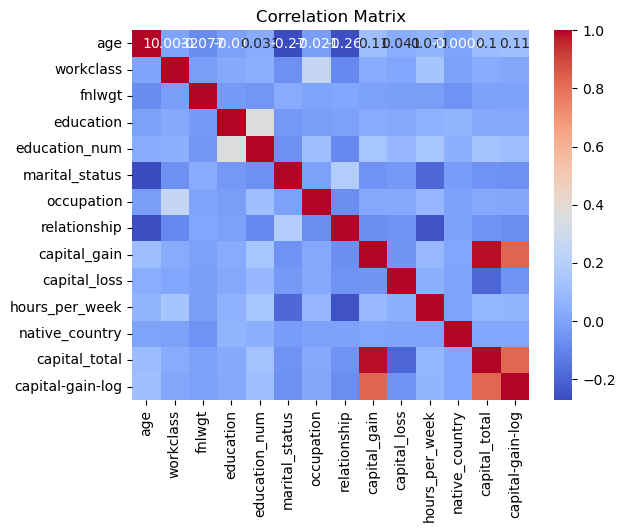


PPS and Correlation analysis completed.


In [20]:
# Correlation matrix comparison
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("\nPPS and Correlation analysis completed.")